## 🎯 where do we want to reach:
L'objectif de ce workshop est d'accompagner les participants dans la création d'un modèle d'apprentissage automatique pour prédire la probabilité d'un AVC. En travaillant avec des données médicales réelles, les participants découvriront les étapes de prétraitement des données, l'ingénierie des variables et l'entraînement des modèles. Ensemble, nous mettrons en œuvre et évaluerons sept techniques d'apprentissage automatique pour identifier les schémas et les facteurs de risque associés aux AVC. Cette expérience pratique vise à doter les participants de compétences concrètes en détection précoce et en modélisation prédictive, tout en soulignant l'importance des analyses basées sur les données dans le domaine de la santé.

## 💿 Dataset Description:
The dataset used in this project contains medical records of patients and their associated risk factors for stroke. It includes the following features:

1. **Id:** Unique identification number for each patient.
2. **Age:** The age of the patient.
3. **Hypertension:** Whether the patient has hypertension (1 for yes, 0 for no).
4. **Heart Disease:** Whether the patient has a history of heart disease (1 for yes, 0 for no).
5. **Ever Married:** Whether the patient has been married (1 for yes, 0 for no).
6. **Work Type:** The type of work the patient does (e.g., private, self-employed, government, children).
7. **Residence Type:** Whether the patient resides in an urban or rural area.
8. **Glucose Level:** The patient's glucose level.
9. **BMI (Body Mass Index):** A measure of body fat based on height and weight.
10. **Smoking Status:** The smoking habit of the patient (e.g., never smoked, formerly smoked, currently smoking).
11. **Stroke:** The target variable indicating whether the patient had a stroke (1 for yes, 0 for no).
    
This dataset is used to identify the risk factors contributing to stroke prediction, making it suitable for classification models to determine the likelihood of stroke based on these factors.

Now, let's begin to code! 👩‍💻

## 📚 Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,11)
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')


## 📖 Reading the dataset

In [2]:
dataset = pd.read_csv("balanced_stroke_dataset_5000.csv")

In [3]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,Male,69,0,0,Yes,Private,Rural,126.1,31.8,formerly smoked,1
1,2,Female,64,0,0,No,Self-employed,Rural,71.6,28.9,Unknown,0
2,3,Male,60,1,0,Yes,Govt_job,Urban,135.2,27.2,smokes,1
3,4,Male,24,0,0,No,Private,Rural,53.8,28.1,never smoked,0
4,5,Male,89,1,0,Yes,Govt_job,Urban,134.4,25.6,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,Male,56,0,0,Yes,Private,Urban,84.1,39.0,smokes,0
4996,4997,Female,75,0,0,Yes,Private,Rural,71.8,32.6,never smoked,0
4997,4998,Male,83,0,1,No,Private,Urban,186.5,21.3,formerly smoked,1
4998,4999,Female,81,1,1,Yes,Self-employed,Urban,161.6,37.0,formerly smoked,1


In [4]:
#Creating a copy of dataset
data = dataset.copy()

## 🛠️ Data Preprocessing

In [5]:
data.shape

(5000, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5000 non-null   int64  
 1   gender             5000 non-null   object 
 2   age                5000 non-null   int64  
 3   hypertension       5000 non-null   int64  
 4   heart_disease      5000 non-null   int64  
 5   ever_married       5000 non-null   object 
 6   work_type          5000 non-null   object 
 7   Residence_type     5000 non-null   object 
 8   avg_glucose_level  5000 non-null   float64
 9   bmi                5000 non-null   float64
 10  smoking_status     5000 non-null   object 
 11  stroke             5000 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 468.9+ KB


In [7]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,61.803800,0.433200,0.349000,125.353820,28.018320,0.504200
std,1443.520003,18.349426,0.495567,0.476702,38.755581,5.963898,0.500032
min,1.000000,18.000000,0.000000,0.000000,-2.100000,2.900000,0.000000
25%,1250.750000,51.000000,0.000000,0.000000,97.400000,24.000000,0.000000
50%,2500.500000,64.000000,0.000000,0.000000,125.850000,28.000000,1.000000
75%,3750.250000,76.000000,1.000000,1.000000,153.425000,32.100000,1.000000
max,5000.000000,89.000000,1.000000,1.000000,251.400000,48.500000,1.000000


In [8]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

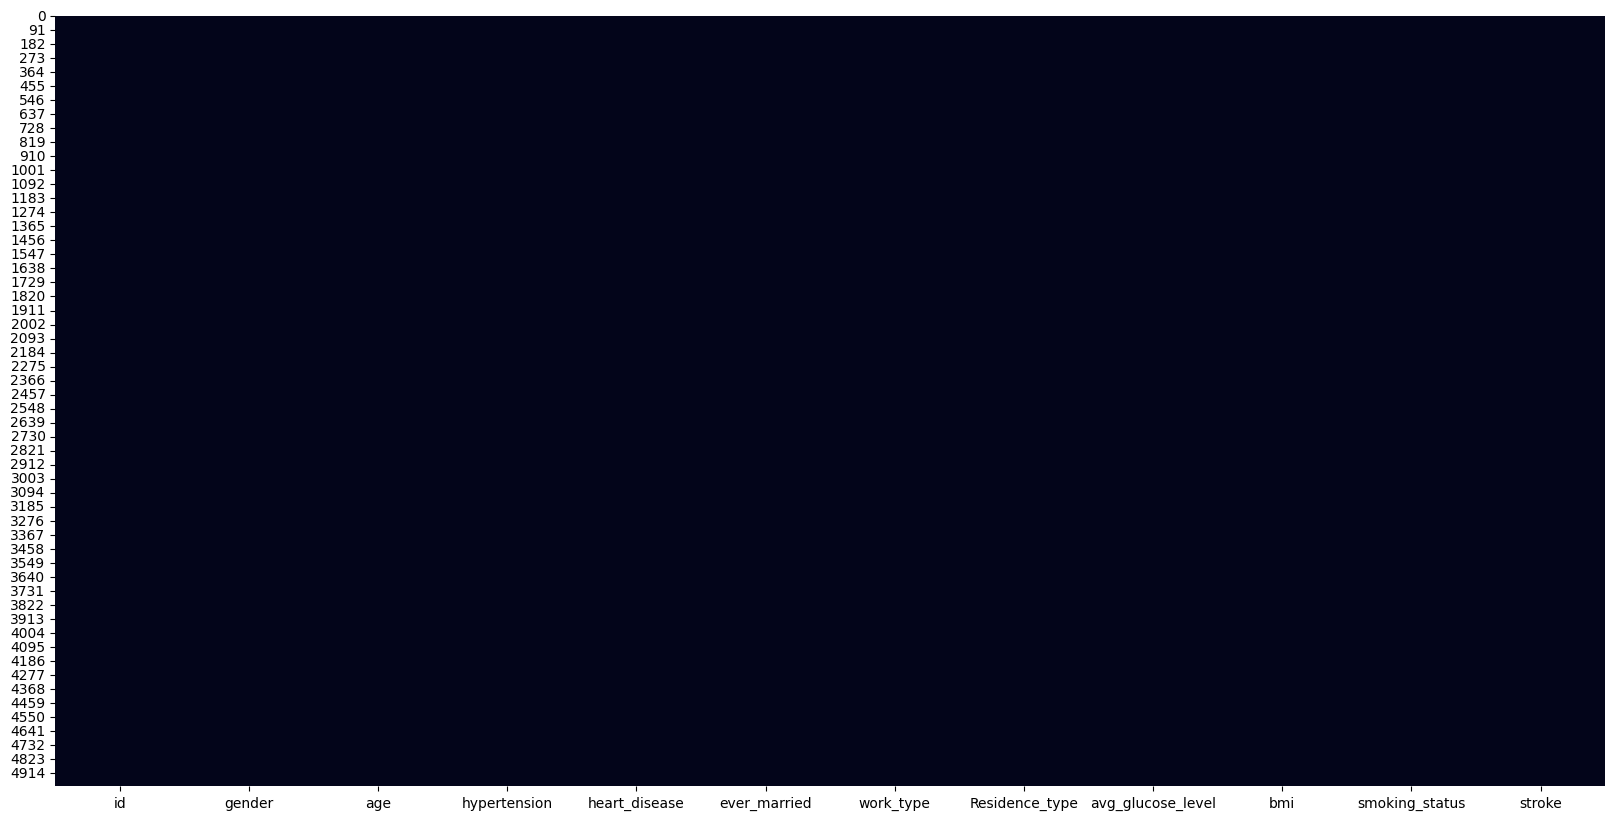

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar=False)
plt.show()

### Dropping unnecessary columns

In [10]:
data.drop(columns=['id'],axis=1,inplace=True) 
data


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,69,0,0,Yes,Private,Rural,126.1,31.8,formerly smoked,1
1,Female,64,0,0,No,Self-employed,Rural,71.6,28.9,Unknown,0
2,Male,60,1,0,Yes,Govt_job,Urban,135.2,27.2,smokes,1
3,Male,24,0,0,No,Private,Rural,53.8,28.1,never smoked,0
4,Male,89,1,0,Yes,Govt_job,Urban,134.4,25.6,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,Male,56,0,0,Yes,Private,Urban,84.1,39.0,smokes,0
4996,Female,75,0,0,Yes,Private,Rural,71.8,32.6,never smoked,0
4997,Male,83,0,1,No,Private,Urban,186.5,21.3,formerly smoked,1
4998,Female,81,1,1,Yes,Self-employed,Urban,161.6,37.0,formerly smoked,1


## 🔡 Encoding Categorical Variables

In [11]:
categorical = ['gender' ,'ever_married','work_type','Residence_type','smoking_status']
numerical = ['age', 'hypertension', 'heart_disease','avg_glucose_level', 'bmi']

In [12]:
print('work_type : ', data['work_type'].unique())
print('gender : ', data['gender'].unique())
print('Residence_type : ', data['Residence_type'].unique())
print('ever_married : ', data['ever_married'].unique())
print('smoking_status : ', data['smoking_status'].unique())

work_type :  ['Private' 'Self-employed' 'Govt_job' 'children']
gender :  ['Male' 'Female']
Residence_type :  ['Rural' 'Urban']
ever_married :  ['Yes' 'No']
smoking_status :  ['formerly smoked' 'Unknown' 'smokes' 'never smoked']


In [13]:
# Creating an instance of LabelEncoder
le = LabelEncoder()

# Encoding each categorical column and printing the original and encoded values
for column in ['smoking_status', 'gender', 'ever_married', 'Residence_type', 'work_type','hypertension','heart_disease']:
    encoded_values = le.fit_transform(data[column])
    print(f"Original values for '{column}': {list(data[column].unique())}")
    print(f"Encoded values for '{column}': {list(le.transform(data[column].unique()))}\n")

Original values for 'smoking_status': ['formerly smoked', 'Unknown', 'smokes', 'never smoked']
Encoded values for 'smoking_status': [1, 0, 3, 2]

Original values for 'gender': ['Male', 'Female']
Encoded values for 'gender': [1, 0]

Original values for 'ever_married': ['Yes', 'No']
Encoded values for 'ever_married': [1, 0]

Original values for 'Residence_type': ['Rural', 'Urban']
Encoded values for 'Residence_type': [0, 1]

Original values for 'work_type': ['Private', 'Self-employed', 'Govt_job', 'children']
Encoded values for 'work_type': [1, 2, 0, 3]

Original values for 'hypertension': [0, 1]
Encoded values for 'hypertension': [0, 1]

Original values for 'heart_disease': [0, 1]
Encoded values for 'heart_disease': [0, 1]



In [14]:
le=LabelEncoder() #creating an isntance of LabelEncoder class
smoking_status = le.fit_transform(data['smoking_status'])
gender = le.fit_transform(data['gender'])
ever_married = le.fit_transform(data['ever_married'])
Residence_type = le.fit_transform(data['Residence_type'])
work_type = le.fit_transform(data['work_type'])

In [15]:
#Replacing the above arrays in the data
data['work_type'] = work_type
data['gender'] = gender
data['Residence_type'] = Residence_type
data['ever_married'] = ever_married
data['smoking_status'] = smoking_status

In [16]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,69,0,0,1,1,0,126.1,31.8,1,1
1,0,64,0,0,0,2,0,71.6,28.9,0,0
2,1,60,1,0,1,0,1,135.2,27.2,3,1
3,1,24,0,0,0,1,0,53.8,28.1,2,0
4,1,89,1,0,1,0,1,134.4,25.6,1,1


In [17]:
data.nunique()

gender                  2
age                    72
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    1550
bmi                   330
smoking_status          4
stroke                  2
dtype: int64

## 📊 Exploratory Data Analysis

### Correlation Heatmap

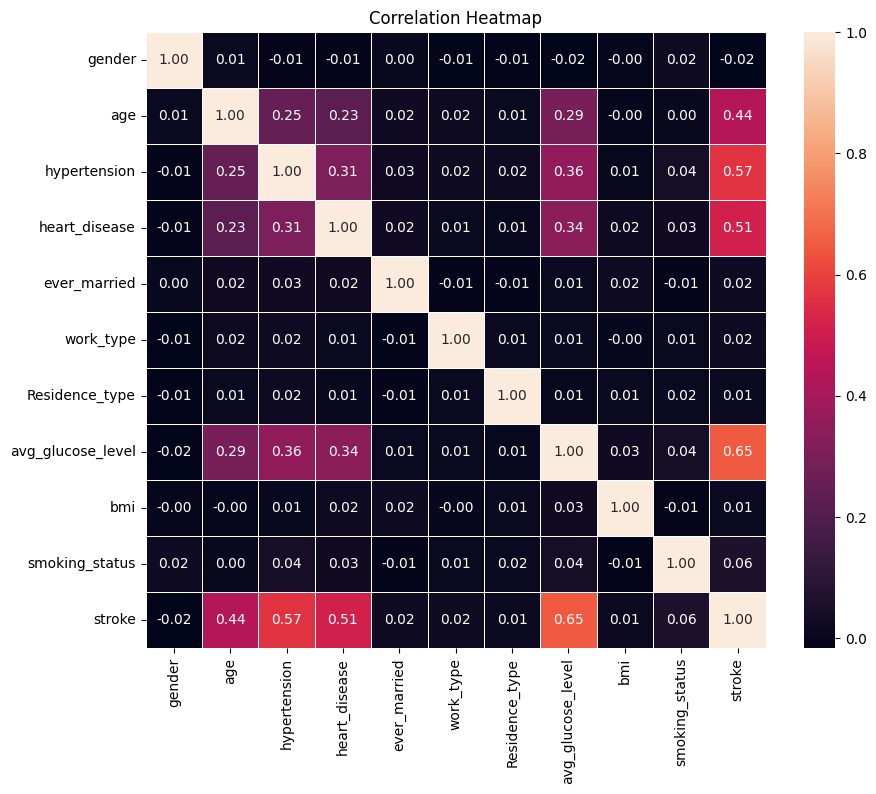

In [18]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### 📈 Univariate Analysis

In [19]:
print(data['gender'].value_counts())
print(data['work_type'].value_counts())
print(data['Residence_type'].value_counts())
print(data['ever_married'].value_counts())
print(data['smoking_status'].value_counts())
print(data['hypertension'].value_counts())
print(data['heart_disease'].value_counts())
print(data['stroke'].value_counts())

1    2504
0    2496
Name: gender, dtype: int64
1    2956
2    1060
0     722
3     262
Name: work_type, dtype: int64
0    2530
1    2470
Name: Residence_type, dtype: int64
1    3428
0    1572
Name: ever_married, dtype: int64
1    2250
3    1511
2     987
0     252
Name: smoking_status, dtype: int64
0    2834
1    2166
Name: hypertension, dtype: int64
0    3255
1    1745
Name: heart_disease, dtype: int64
1    2521
0    2479
Name: stroke, dtype: int64


#### Gender Analysis

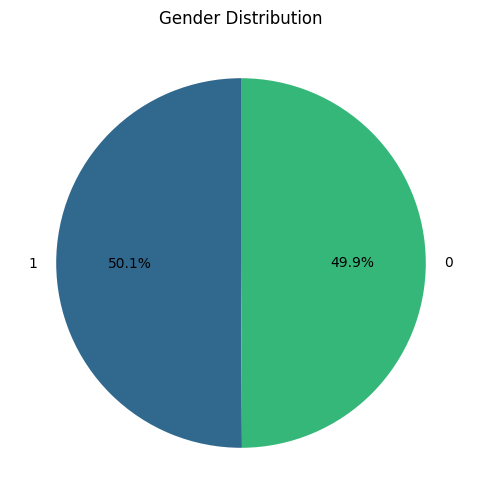

In [20]:
plt.figure(figsize=(6, 6))
gender_counts = data['gender'].value_counts()
plt.pie(
    gender_counts, 
    labels=gender_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette('viridis', len(gender_counts))
)
plt.title("Gender Distribution")
plt.show()


**Observations**
**we observe that the genders are almost equitably balanced**

#### Analysis of residence type

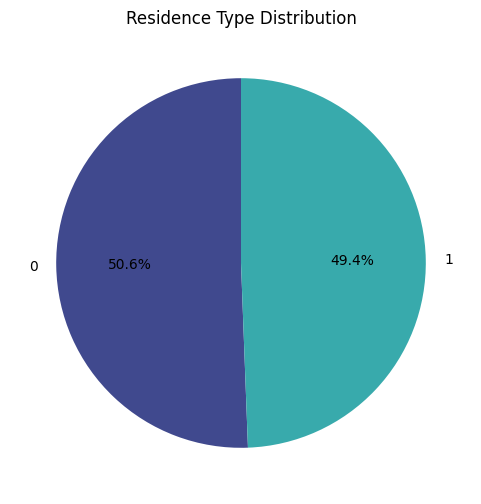

In [21]:
plt.figure(figsize=(6, 6))
residence_counts = data['Residence_type'].value_counts()
plt.pie(
    residence_counts, 
    labels=residence_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette('mako', len(residence_counts))
)
plt.title("Residence Type Distribution")
plt.show()


**observation**
**we osberve that residence is balanced as well**

#### Analysis of ever married

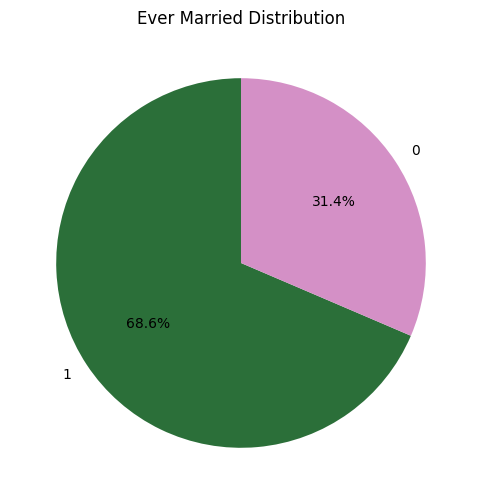

In [22]:
plt.figure(figsize=(6, 6))
married_counts = data['ever_married'].value_counts()
plt.pie(
    married_counts, 
    labels=married_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette('cubehelix', len(married_counts))
)
plt.title("Ever Married Distribution")
plt.show()


**observation**
**we observe that dataset contains more married people than singles one**

#### Work type analysis

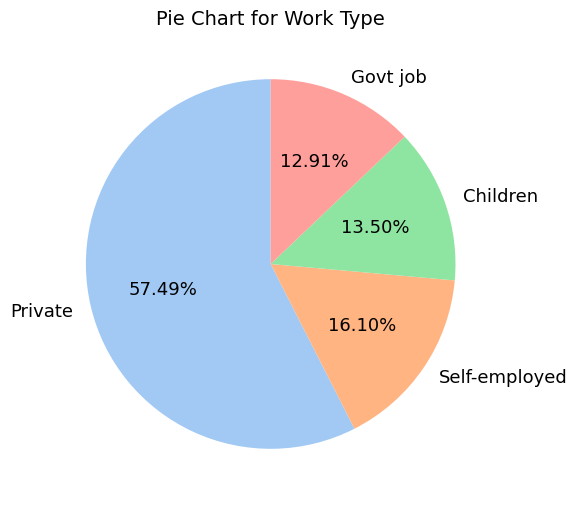

In [23]:
plt.figure(figsize=(6, 6))
wt1 = [2925, 819, 687, 657]  # Data for the work types
textprops = {"fontsize": 13}  # Font size for text
colors = sns.color_palette('pastel', len(wt1))  # Adding a pastel color palette

# Creating the pie chart
plt.pie(
    wt1,
    labels=['Private', 'Self-employed', 'Children', 'Govt job'],
    autopct='%1.2f%%',
    textprops=textprops,
    startangle=90,
    colors=colors
)
plt.title('Pie Chart for Work Type', fontsize=14)
plt.show()


**observation**

**we significantly notice the private work-type big prence in our dataset although the rest of the percentage is equitably divided into the rest of the work types**

#### Smoking status analysis

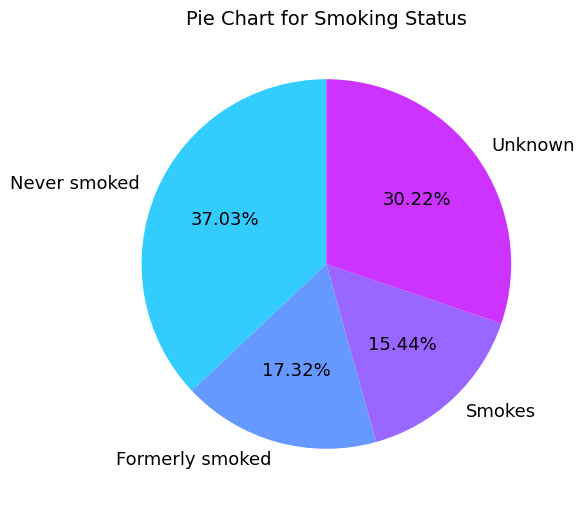

In [24]:
plt.figure(figsize=(6, 6))
temp = [1892, 885, 789, 1544]
labels = ['Never smoked', 'Formerly smoked', 'Smokes', 'Unknown']
textprops = {"fontsize": 13}
colors = sns.color_palette('cool', len(temp))  # Adding a 'cool' color palette

# Creating the pie chart
plt.pie(
    temp, 
    labels=labels, 
    autopct='%1.2f%%', 
    textprops=textprops, 
    startangle=90,  # Starting the pie chart at the top
    colors=colors    # Applying the color palette
)
plt.title('Pie Chart for Smoking Status', fontsize=14)
plt.show()


**observation**

**we can cleary see that bigest part of this pie is reserved to  both unknown and never smoked people while the rest of the percetange is equitably divided into the rest of the Smoking_status**

#### Graphs for heart disease and hypertension

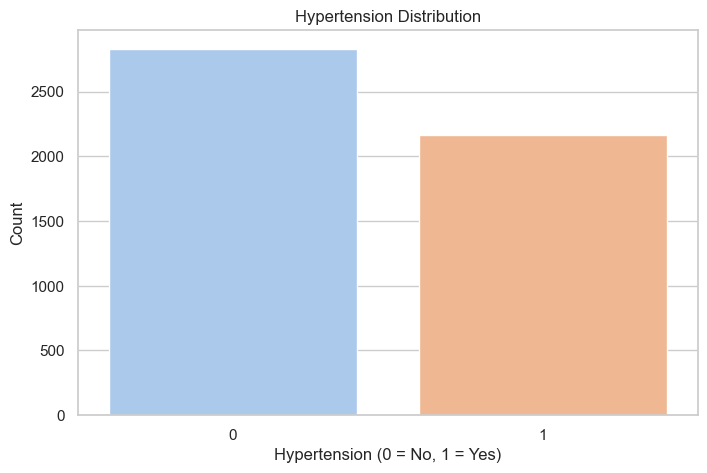

In [25]:
# Set a consistent style
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='hypertension', palette='pastel')
plt.title("Hypertension Distribution")
plt.xlabel("Hypertension (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


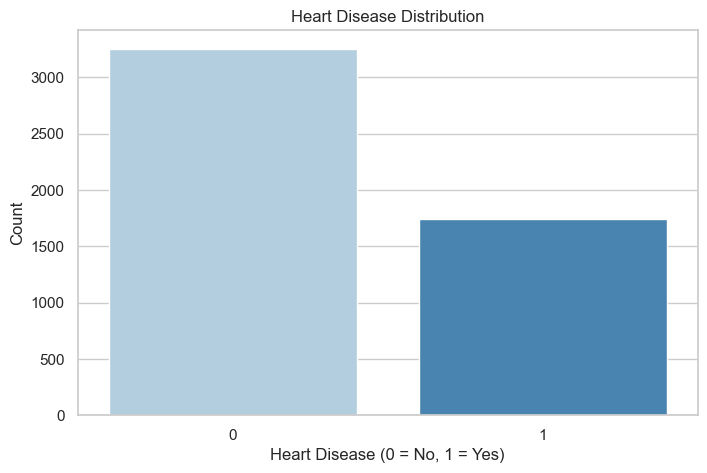

In [26]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='heart_disease', palette='Blues')
plt.title("Heart Disease Distribution")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


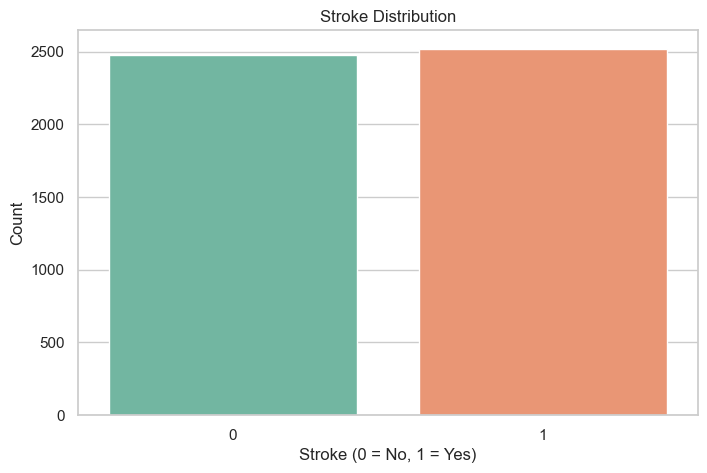

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='stroke', palette='Set2')
plt.title("Stroke Distribution")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


### 📉 Bivariate Analysis

#### Age, BMI, Average glucose level vs Stroke

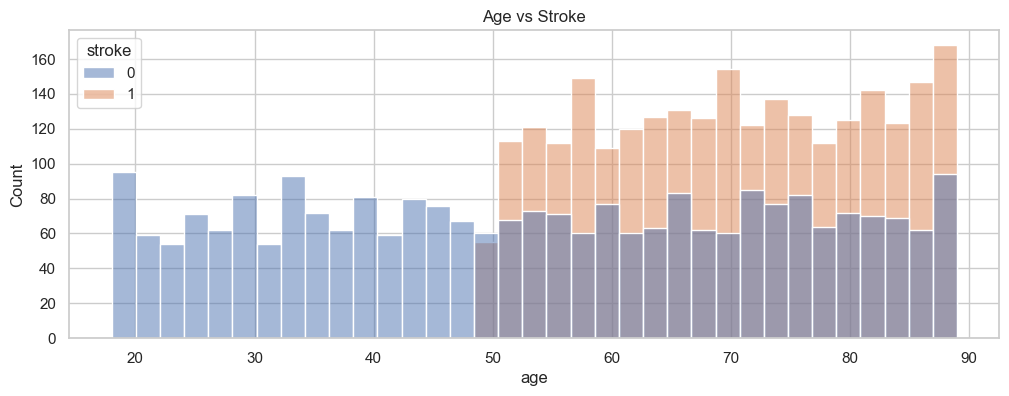

In [28]:
plt.figure(figsize=(12, 4))
pl = sns.histplot(x='age', data=data, hue='stroke', bins=35)
pl.set_title('Age vs Stroke')
plt.show()

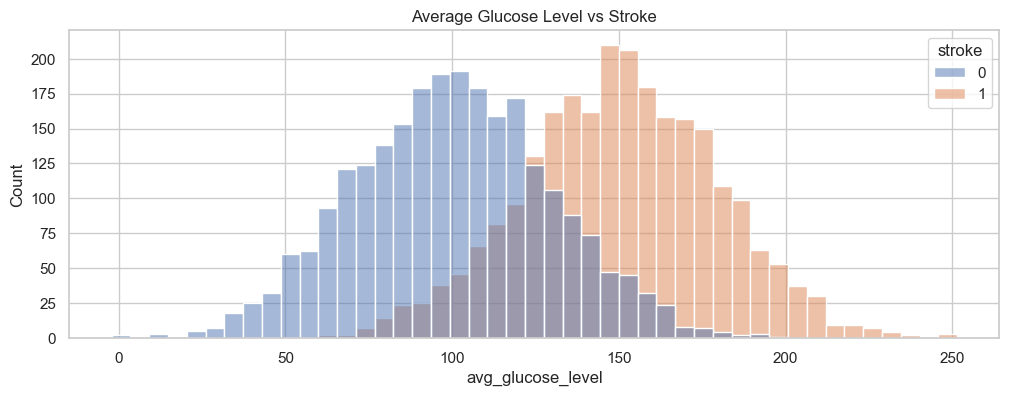

In [29]:
plt.figure(figsize=(12,4))
pl = sns.histplot(x='avg_glucose_level', data=data, hue='stroke', bins=45)
pl.set_title('Average Glucose Level vs Stroke')
plt.show()

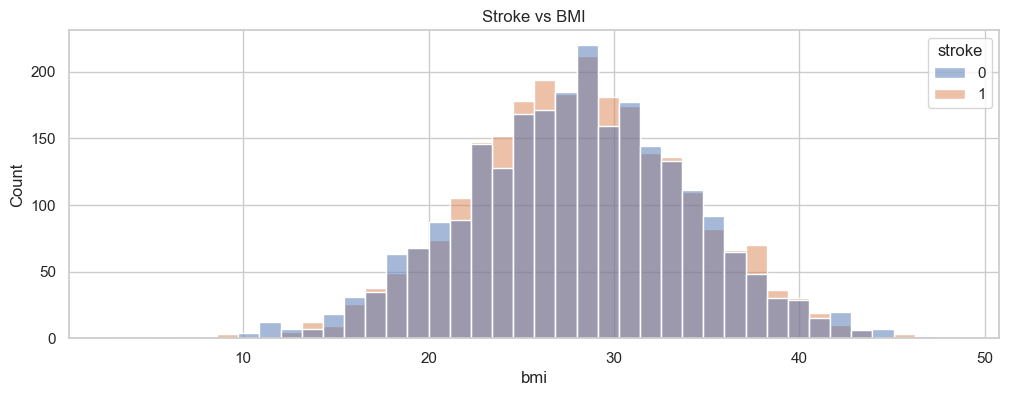

In [30]:
plt.figure(figsize=(12,4))
pl = sns.histplot(x='bmi', data=data, hue='stroke', bins=40)
pl.set_title('Stroke vs BMI')
plt.show()

### Countplots

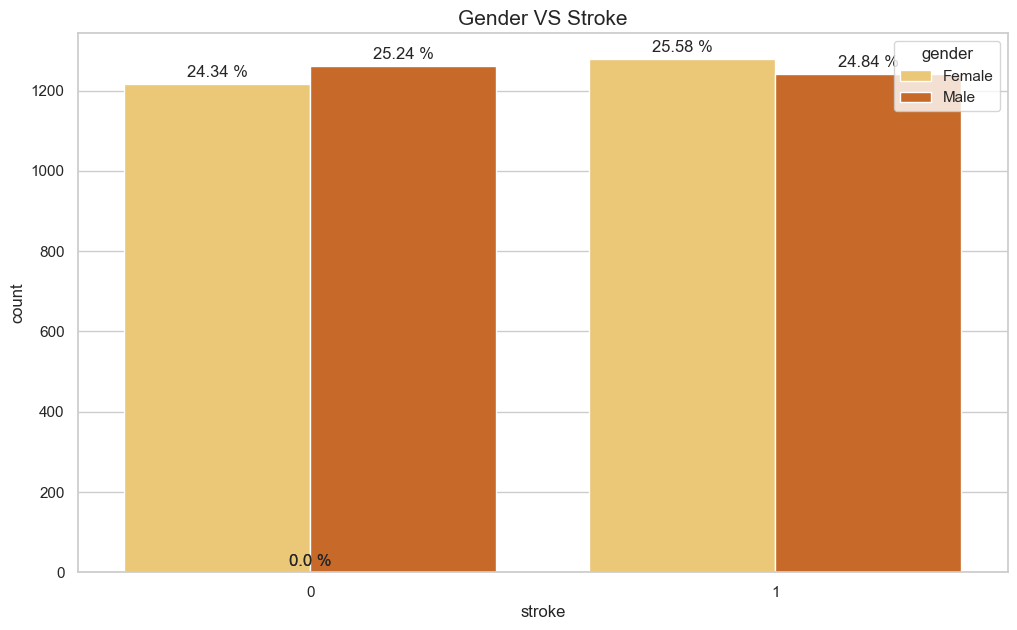

In [31]:
sns.set_style('whitegrid')
countplt, ax = plt.subplots(figsize = (12,7))
ax=sns.countplot(x=data['stroke'],hue=dataset['gender'],palette = 'YlOrBr')
ax.set_title("Gender VS Stroke",fontsize = 15)

for j in ax.patches:
        ax.annotate(f'{round(j.get_height()/len(dataset)*100,2)} %', xy=(j.get_x() + j.get_width() / 2,  
            j.get_height()), ha='center',  va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

**Observations**
- we observe that Females are slightly more resistant than Males 

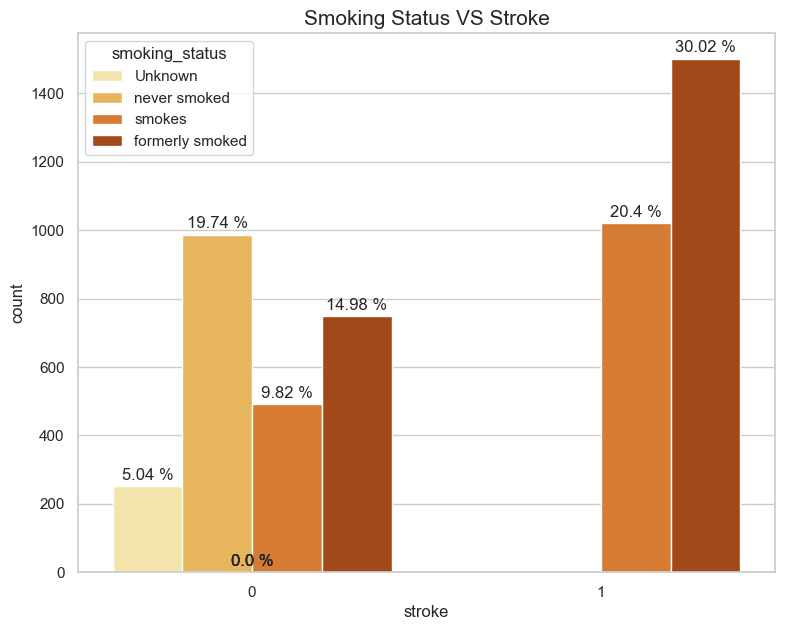

In [32]:
countplt, ax = plt.subplots(figsize = (9,7))
ax=sns.countplot(x=dataset['stroke'],hue=dataset['smoking_status'],palette = 'YlOrBr',)
ax.set_title("Smoking Status VS Stroke",fontsize = 15)
for p in ax.patches:
        ax.annotate(f'{round(p.get_height()/len(dataset)*100,2)} %', xy=(p.get_x() + p.get_width() / 2,  
            p.get_height()), ha='center',  va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

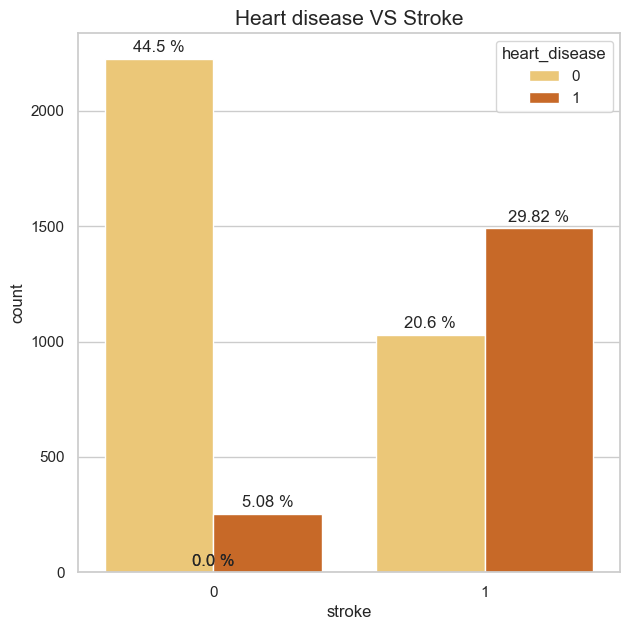

In [33]:
countplt, ax = plt.subplots(figsize = (7,7))
ax=sns.countplot(x=dataset['stroke'],hue=dataset['heart_disease'],palette = 'YlOrBr')
ax.set_title("Heart disease VS Stroke",fontsize = 15)
for p in ax.patches:
        ax.annotate(f'{round(p.get_height()/len(dataset)*100,2)} %', xy=(p.get_x() + p.get_width() / 2,  
            p.get_height()), ha='center',  va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

Text(0.5, 1.0, 'Residence Type VS Stroke')

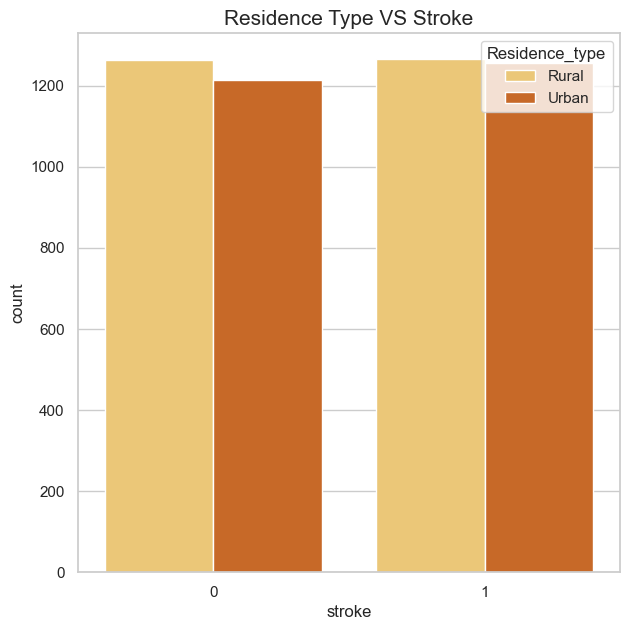

In [34]:
countplt, ax = plt.subplots(figsize = (7,7))
ax=sns.countplot(x=dataset['stroke'],hue=dataset['Residence_type'],palette = 'YlOrBr')
ax.set_title("Residence Type VS Stroke",fontsize = 15)

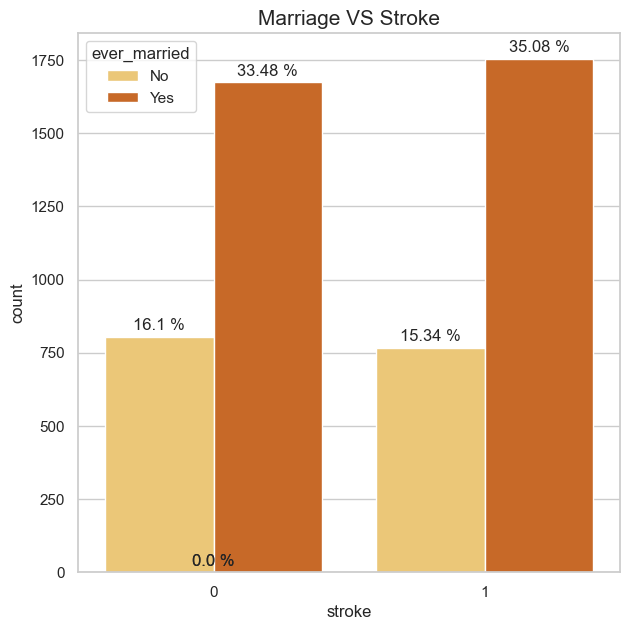

In [35]:
countplt, ax = plt.subplots(figsize = (7,7))
ax=sns.countplot(x=dataset['stroke'],hue=dataset['ever_married'],palette = 'YlOrBr')
ax.set_title("Marriage VS Stroke",fontsize = 15)
for p in ax.patches:
        ax.annotate(f'{round(p.get_height()/len(dataset)*100,2)} %', xy=(p.get_x() + p.get_width() / 2,  
            p.get_height()), ha='center',  va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

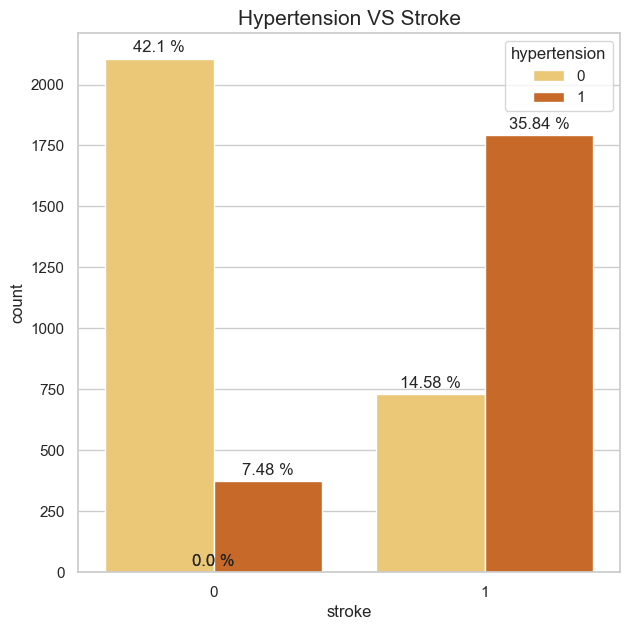

In [36]:
countplt, ax = plt.subplots(figsize = (7,7))
ax=sns.countplot(x=dataset['stroke'],hue=dataset['hypertension'],palette = 'YlOrBr')
ax.set_title("Hypertension VS Stroke",fontsize = 15)

for p in ax.patches:
        ax.annotate(f'{round(p.get_height()/len(dataset)*100,2)} %', xy=(p.get_x() + p.get_width() / 2,  
            p.get_height()), ha='center',  va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

## 🔍  Exploring need for oversampling

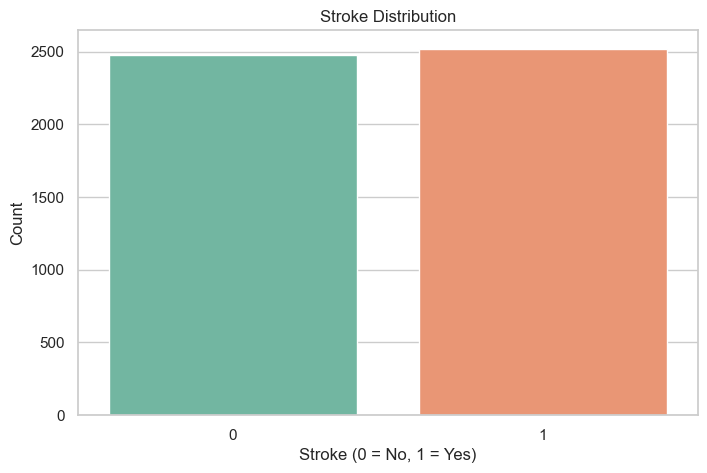

In [37]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='stroke', palette='Set2')
plt.title("Stroke Distribution")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

## 𐄷 Oversampling using SMOTE

In [38]:
data1 = data.copy()
X = data.drop('stroke', axis = 1)
Y = data['stroke']
Y = pd.DataFrame(Y)


In [39]:
smote = SMOTE(random_state = 10)
X1, Y1 = smote.fit_resample(X, Y)

In [40]:
Y.value_counts()

stroke
1         2521
0         2479
dtype: int64

In [41]:
Y1 = pd.DataFrame(Y1)
X1 = pd.DataFrame(X1)
Y1.value_counts()

stroke
0         2521
1         2521
dtype: int64

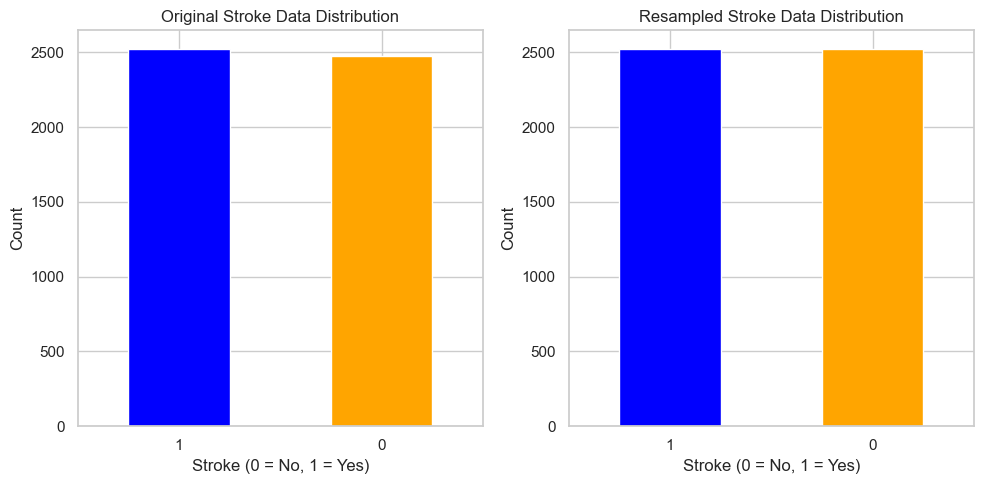

In [42]:

import matplotlib.pyplot as plt

# Original class distribution
original_counts = Y['stroke'].value_counts()

# After SMOTE class distribution
resampled_counts = Y1['stroke'].value_counts()

# Create a bar plot to compare the distributions
plt.figure(figsize=(10, 5))

# Plot original data distribution
plt.subplot(1, 2, 1)
original_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Original Stroke Data Distribution')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Plot resampled data distribution
plt.subplot(1, 2, 2)
resampled_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Resampled Stroke Data Distribution')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [43]:
X1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,69,0,0,1,1,0,126.100000,31.800000,1
1,0,64,0,0,0,2,0,71.600000,28.900000,0
2,1,60,1,0,1,0,1,135.200000,27.200000,3
3,1,24,0,0,0,1,0,53.800000,28.100000,2
4,1,89,1,0,1,0,1,134.400000,25.600000,1
...,...,...,...,...,...,...,...,...,...,...
5037,0,77,0,0,1,2,1,110.078700,40.028564,1
5038,1,49,0,0,1,2,0,87.639807,24.387574,1
5039,1,36,0,0,1,1,0,158.513478,28.069798,2
5040,0,20,0,0,0,0,0,93.601568,27.200000,2


In [44]:
X1.columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type','Residence_type', 'avg_glucose_level','bmi','smoking_status']
X1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,69,0,0,1,1,0,126.100000,31.800000,1
1,0,64,0,0,0,2,0,71.600000,28.900000,0
2,1,60,1,0,1,0,1,135.200000,27.200000,3
3,1,24,0,0,0,1,0,53.800000,28.100000,2
4,1,89,1,0,1,0,1,134.400000,25.600000,1
...,...,...,...,...,...,...,...,...,...,...
5037,0,77,0,0,1,2,1,110.078700,40.028564,1
5038,1,49,0,0,1,2,0,87.639807,24.387574,1
5039,1,36,0,0,1,1,0,158.513478,28.069798,2
5040,0,20,0,0,0,0,0,93.601568,27.200000,2


In [45]:
Y1

,stroke
0,1
1,0
2,1
3,0
4,1
...,...
5037,0
5038,0
5039,0
5040,0


## ✂️ Training and test split

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X1,Y1,test_size=0.2 ,random_state = 105)

In [47]:
Y_train.value_counts()

stroke
1         2018
0         2015
dtype: int64

## 🤖 Model Training

### 1. Naive Bayes

In [48]:
NB = GaussianNB()
NB.fit(X_train, Y_train)
Y_pred_NB = NB.predict(X_test)
NB_accuracy = accuracy_score(Y_test,Y_pred_NB)
print(NB_accuracy*100,'%')



88.9990089197225 %


              precision    recall  f1-score   support

           0       0.89      0.89      0.89       506
           1       0.89      0.89      0.89       503

    accuracy                           0.89      1009
   macro avg       0.89      0.89      0.89      1009
weighted avg       0.89      0.89      0.89      1009



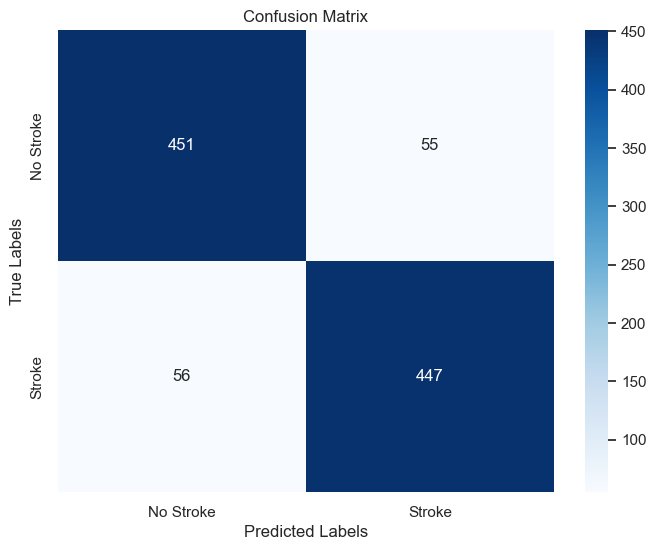

In [49]:
# Calculate the confusion matrix
CM = confusion_matrix(Y_test, Y_pred_NB)

print(classification_report(Y_test, Y_pred_NB))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### 2. Logistic Regression

In [50]:
LR = LogisticRegression()
LR.fit(X_train,Y_train)
Y_Res_LR=LR.predict(X_test)
LR_Accuracy = accuracy_score(Y_test, Y_Res_LR)
print(LR_Accuracy*100,'%')

88.9990089197225 %


              precision    recall  f1-score   support

           0       0.89      0.89      0.89       506
           1       0.89      0.89      0.89       503

    accuracy                           0.89      1009
   macro avg       0.89      0.89      0.89      1009
weighted avg       0.89      0.89      0.89      1009



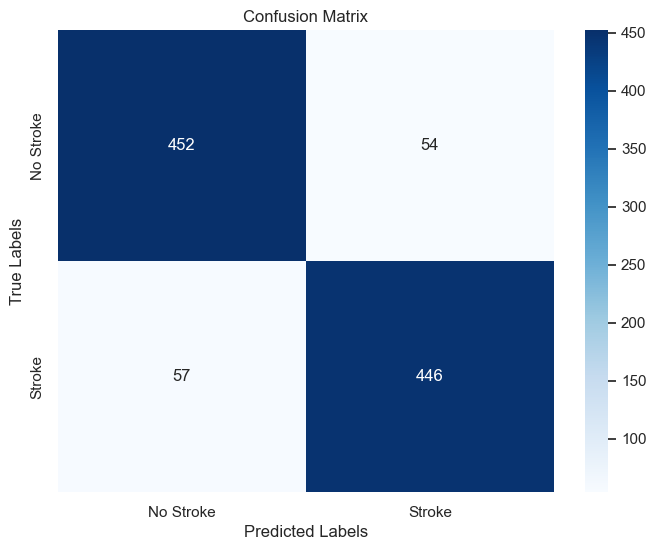

In [51]:
# Calculate the confusion matrix
CM = confusion_matrix(Y_test, Y_Res_LR)
print(classification_report(Y_test, Y_Res_LR))
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### 3. Decision Tree Classifier

In [52]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train,Y_train)


DecisionTreeClassifier()

In [53]:
Y_pred_DTC = DTC.predict(X_test)
DTC_Accuracy = accuracy_score(Y_test, Y_pred_DTC)
print(DTC_Accuracy*100,'%')

91.47670961347869 %


              precision    recall  f1-score   support

           0       0.91      0.93      0.92       506
           1       0.92      0.90      0.91       503

    accuracy                           0.91      1009
   macro avg       0.92      0.91      0.91      1009
weighted avg       0.91      0.91      0.91      1009



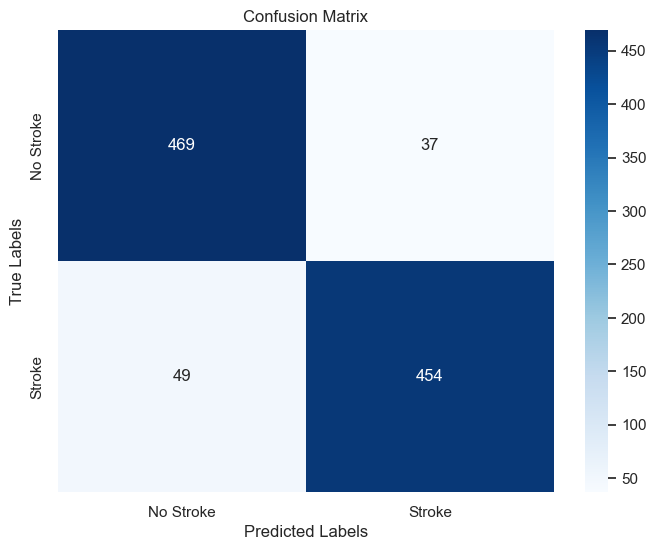

In [54]:
# Calculate the confusion matrix
CM = confusion_matrix(Y_test, Y_pred_DTC)

print(classification_report(Y_test, Y_pred_DTC))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### 4. KNN

In [55]:
KNN_clf = KNeighborsClassifier()
KNN_clf.fit(X_train,Y_train)
Y_Res_KNN=KNN_clf.predict(X_test)
KNN_Accuracy = accuracy_score(Y_test, Y_Res_KNN)
print(KNN_Accuracy*100,'%')

84.34093161546086 %


              precision    recall  f1-score   support

           0       0.85      0.84      0.84       506
           1       0.84      0.85      0.84       503

    accuracy                           0.84      1009
   macro avg       0.84      0.84      0.84      1009
weighted avg       0.84      0.84      0.84      1009



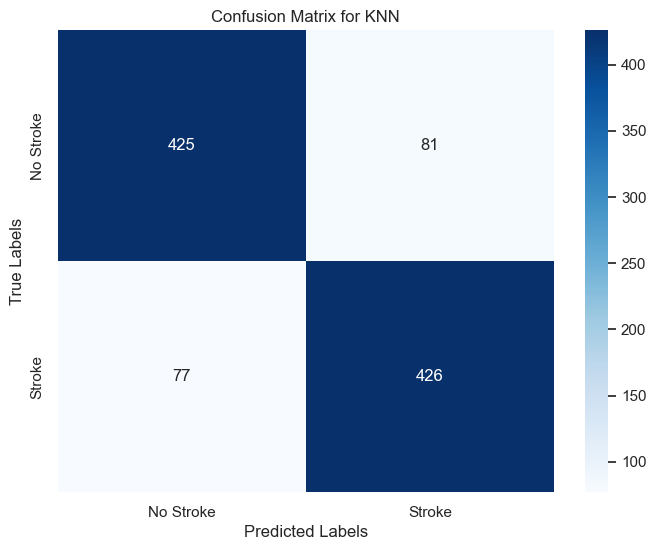

In [56]:
# Calculate the confusion matrix
CM = confusion_matrix(Y_test, Y_Res_KNN)

print(classification_report(Y_test, Y_Res_KNN))
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### 5. AdaBoost Classifier

In [57]:
ADC = AdaBoostClassifier()
ADC.fit(X_train,Y_train)
Y_pred_ADC = ADC.predict(X_test)
ADC_Accuracy = accuracy_score(Y_test,Y_pred_ADC)
print(ADC_Accuracy*100,"%")


93.1615460852329 %


              precision    recall  f1-score   support

           0       0.94      0.93      0.93       506
           1       0.93      0.94      0.93       503

    accuracy                           0.93      1009
   macro avg       0.93      0.93      0.93      1009
weighted avg       0.93      0.93      0.93      1009



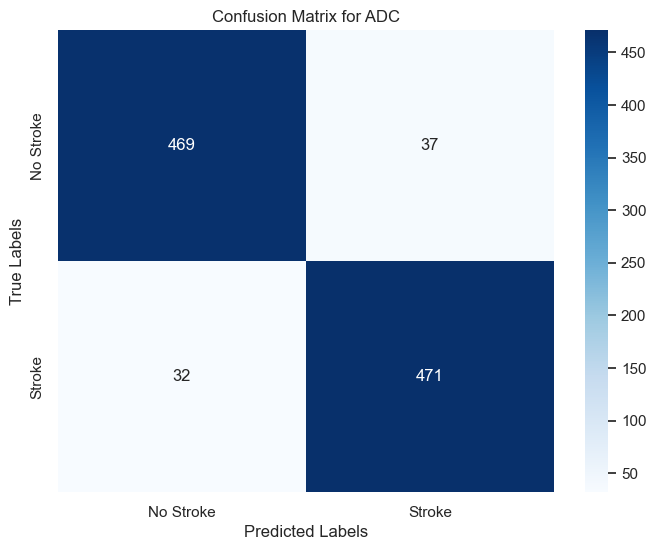

In [58]:
# Calculate the confusion matrix
CM = confusion_matrix(Y_test, Y_pred_ADC)


print(classification_report(Y_test, Y_pred_ADC))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix for ADC')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### 6. Random Forest Classifier

In [59]:
RF = RandomForestClassifier(n_estimators=1000, random_state=47 , n_jobs = 3)
RF.fit(X_train,Y_train)
Y_Res_RF=RF.predict(X_test)
RF_Accuracy = accuracy_score(Y_test, Y_Res_RF)
print(RF_Accuracy*100,'%')

92.76511397423192 %


              precision    recall  f1-score   support

           0       0.93      0.92      0.93       506
           1       0.92      0.93      0.93       503

    accuracy                           0.93      1009
   macro avg       0.93      0.93      0.93      1009
weighted avg       0.93      0.93      0.93      1009

specificity = 0.924901185770751


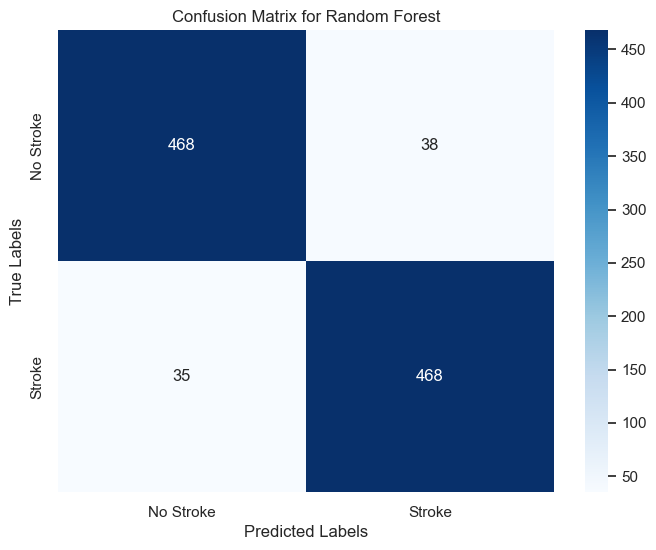

In [60]:
# Calculate the confusion matrix
CM = confusion_matrix(Y_test, Y_Res_RF)
print(classification_report(Y_test, Y_Res_RF))
print("specificity =", CM[0][0]/(CM[0][0]+CM[0][1]))
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### 7. XGBoost

In [61]:
XG_classifier = XGBClassifier()
XG_classifier.fit(X_train, Y_train)
Y_pred_xg = XG_classifier.predict(X_test)
XG_Accuracy = accuracy_score(Y_test,Y_pred_xg)
print(XG_Accuracy*100,"%")

92.46778989098117 %



Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       506
           1       0.92      0.93      0.93       503

    accuracy                           0.92      1009
   macro avg       0.92      0.92      0.92      1009
weighted avg       0.92      0.92      0.92      1009



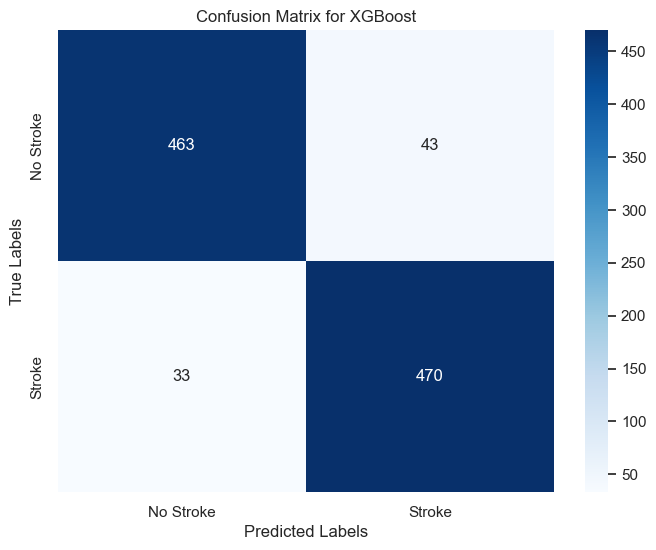

In [62]:

# Calculate the confusion matrix
CM = confusion_matrix(Y_test, Y_pred_xg)

# Print the classification report
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_xg))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


## 📋 Model Evaluation

In [63]:
#A = {'Models' : ['Gaussian Naive Bayes','Logistic Regression', 'Decision Tree Classifier', 'K Nearest Neighbors', 'AdaBoost','XGBoost', 'Random Forest Classifier'],'AUC Scores' :[ roc_auc_score(Y_test, y_score_NB), roc_auc_score(Y_test, y_score_LR), roc_auc_score(Y_test, y_score_DTC), roc_auc_score(Y_test, y_score_KNN), roc_auc_score(Y_test, y_score_ADC), roc_auc_score(Y_test, y_score_xg), roc_auc_score(Y_test, y_score_RF)]}
#A = pd.DataFrame(A)
#A

# Model Selection : LogisticRegression

In [64]:
model = LogisticRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print(f'Training Accuracy: {accuracy_score(Y_train, model.predict(X_train))}')
print(f'Testing Accuracy: {accuracy_score(Y_test, y_pred)}')

Training Accuracy: 0.9030498388296554
Testing Accuracy: 0.889990089197225


In [65]:

def predict_stroke(gender,age, hypertension, heart_disease,ever_married,work_type,residence_type, avg_glucose_level, bmi, smoking_status):

    # Arrange the input features into a list
    input_features = [gender,age, hypertension, heart_disease,ever_married,work_type,residence_type, avg_glucose_level, bmi, smoking_status]

    input_features = np.array(input_features).reshape(1, -1)


    prediction = model.predict(input_features)

    return prediction[0]

result = predict_stroke(
                        gender=1, #female=0,male=1,other=2,
                        age=54,# min =0.08 max=82
                        hypertension=0, # 0=no 1=yes
                        heart_disease=0, # 0=no 1=yes
                        ever_married=1, # 0=no 1=yes
                        work_type=2, # govt_job=0 never_worked=1 private=2 self_employed=3 children=4
                        residence_type=1,  # rachid Rural=0  Urban=1 | moh Urban=0  Rural=1
                        avg_glucose_level=104.51,# min=55.12 max =271.74
                        bmi=27.3,#min=10.3 max=97.6
                        smoking_status=3 #neversmoked=2 #formerlysmoked=1 #smokes=3 #unknown=0
                        )

print("Stroke prediction:", "Yes the patient risk to have a stroke" if result == 1 else "No the patient should be clean")

Stroke prediction: No the patient should be clean


# save the model

In [66]:
import pickle

# Step 2: Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully.")

Model saved successfully.


## 🏁 Conclusion
* All models perform significantly better than random chance (represented by the diagonal dashed line in the ROC curve)
* The ensemble methods (XGBoost, Random Forest, AdaBoost) consistently outperform the simpler algorithms
* There's a notable performance gap between the ensemble methods and traditional algorithms like Naive Bayes and Logistic Regression
* For optimal performance, XGBoost or Random Forest would be the best choices as they demonstrate the highest and most consistent performance
* If computational resources are limited, KNN could serve as a good alternative with relatively strong performance